Here is an exampe of the data. It is a measure of the "response" of a cell at one pixel to a certain stimulus. He has millions of these signals.

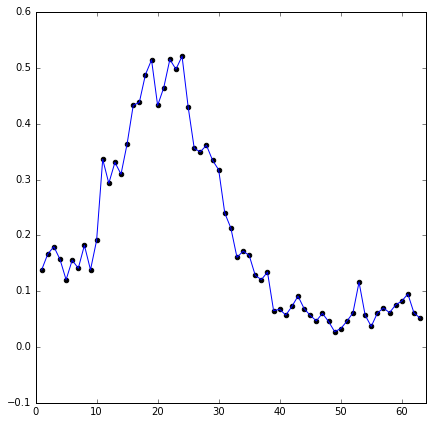

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ydata = np.genfromtxt('dataForNathan.csv', delimiter=',')[:-1]
xdata = np.arange(ydata.size)+1
plt.figure(figsize=(7,7)); plt.xlim(0,64)
plt.plot(xdata, ydata); plt.scatter(xdata,ydata, c='k')
plt.show()

He is choosing to model the function as the difference of Gamma distributions

$$\huge F(x,\vec{p}) = g(x,\frac{p_1}{p_3}, \frac{dt}{p_3})p_5 - g(x,\frac{p_2}{p_4}, \frac{dt}{p_4})\frac{1}{p_6} $$

Where the gamma distribution $g$ is given as follows...

$$ \huge g(x,\alpha, \beta) = \frac{\beta^\alpha x^{\alpha-1} e^{-x \beta}}{\Gamma(\alpha)} $$

And the gamma function $\Gamma$ is defined in the usual way.

$$ \huge \Gamma(k) = \int_0^\infty x^{1-k} e^{-x} dx, \hspace{20pt} k \in (0,\infty) $$

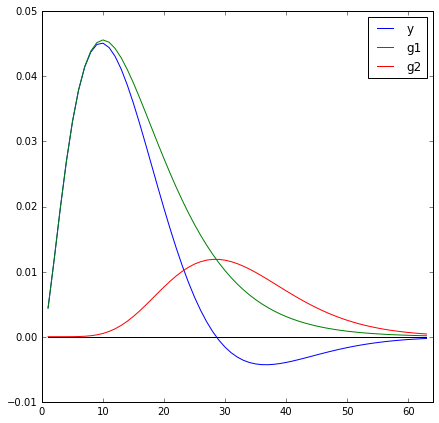

In [3]:
import scipy.special as sp
def dog(x, p):
    FR = 4.0
    dt = 1.0/FR
    a1 = p[0]/p[2]
    b1 = dt/p[2]
    a2 = p[1]/p[3]
    b2 = dt/p[3]

    c1 = a1*np.log(b1) - sp.gammaln(a1) + np.log(p[4])
    c2 = a2*np.log(b2) - sp.gammaln(a2) - np.log(p[5])
    g1 = np.exp(c1 + (a1 - 1.0)*np.log(x) - b1*x)
    g2 = np.exp(c2 + (a2 - 1.0)*np.log(x) - b2*x)

    y = g1 - g2

    return (y,g1,g2)

params = np.array([4.0,8.0,1.5,0.89,.93,3.3])
y,g1,g2 = dog(xdata, params)
fig = plt.figure(figsize=(7,7))
plt.plot(xdata,y,label='y')
plt.plot(xdata,g1,label='g1')
plt.plot(xdata,g2,label='g2')
plt.plot(xdata,np.zeros(y.size),c='k')
plt.legend()
plt.xlim(0,64)
plt.figure(figsize=(50,50))
plt.show()

The problem is formulated into the usual nonlinear least sqaures problem as follows

$$ \huge \min_{p} \frac{1}{2} \sum_i \rho_i \biggl (\biggl | \biggl | y_i - F(x_i,\vec{p}) \biggr | \biggr |^2 \biggr)$$
$$ \huge \text{s.t.} \hspace{30pt} l_j \le p_j \le u_j$$

Here are some examples of successful fits...
![](media/orientation8_pix1.png)
![](media/orientation8_pix0.png)

------
### Questions

1. What is a high-level explanation of the difference between trust region methods and line search methods?
A: Trust region turns the problem into many 1D problems, line search 
2. Which method should I use and why?
3. Is there a way to quantify or qualify the general topology of the feature space. More precisely, can we somehow describe the feasability of an optimization, by describing things like sensitivity to initial conditions, etc.
4. What is [Covariance Estimation](http://ceres-solver.org/nnls_solving.html#covariance-estimation), and how is it used to "assess the quality of the solution"?
5. What is the difference/relationship between weighted least squares and the loss function?